# **Analisis Sentimen dari Ulasan Aplikasi Shopee pada Google Play Store**
Nama: Fayadh Rizqi Zamzami

Cohort ID: MC858D5Y1383

Kelas : MC-25

# **Import Library**

In [ ]:
!pip install Sastrawi
!pip install gensim
!pip install wordcloud




In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import gdown
import matplotlib.pyplot as plt
import datetime as dt
import re
import string
import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
# Preprocessing Libraries
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory



# Visualization
from wordcloud import WordCloud

# **LOAD DATASET**

In [ ]:
# ID file dari URL
file_id = '1AVouyla8-a9POCSChZvhqI0gdBe4AURi'

# URL untuk download
url = f'https://drive.google.com/uc?id={file_id}'

# Nama file output
output = 'ulasan_aplikasi_shopee.csv'

# Download file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1AVouyla8-a9POCSChZvhqI0gdBe4AURi
To: /content/ulasan_aplikasi_shopee.csv
100%|██████████| 105M/105M [00:00<00:00, 122MB/s] 


'ulasan_aplikasi_shopee.csv'

In [ ]:
# Baca file CSV
shopee_reviews_df = pd.read_csv('/content/ulasan_aplikasi_shopee.csv')

In [ ]:
shopee_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3eb0260c-4c79-4006-9838-60c8b32d6802,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kalo bisa paket² yg banyak di bagi atau di ali...,1,149,3.47.39,2025-04-08 07:44:17,"Hi kak Fardeanto Palapa , maaf ya sudah buat k...",2025-04-08 08:27:09,3.47.39
1,66ff3e08-dfc0-475a-afe0-8afc5dd5176e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sorry, kenapa ya setiap membatalkan pesanan/di...",1,13,3.47.39,2025-04-09 17:17:09,"Hai kak patimura, maaf ya trkait pmbayaran COD...",2025-04-09 18:24:58,3.47.39
2,9431a5a1-a6d7-4a8a-9e3e-b3f09a5704b2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Edit: Aplikasi sudah terbaru di v3.47.39. user...,2,66,3.47.39,2025-04-07 17:31:41,Hai kak maaf udh bikin ga nyaman terkait kenda...,2025-04-07 17:09:59,3.47.39
3,1f7d7626-cc85-467e-b5a5-96853c5a5a7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong shopee tulisannya jangan terlalu kecil ...,2,31,3.47.39,2025-04-07 18:29:20,Hai kak maaf udh bikin ga nyaman terkait kenda...,2025-04-07 19:25:40,3.47.39
4,54df2b65-5871-472a-b37a-c2dd32bb35c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tolong jika status pesanan sudah ""Dalam pengan...",5,733,3.47.39,2025-04-07 04:32:26,"Hai kak Dide Naufal, maaf ya buat kamu gak nya...",2025-04-07 05:20:14,3.47.39


In [ ]:
shopee_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166500 entries, 0 to 166499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              166500 non-null  object
 1   userName              166500 non-null  object
 2   userImage             166500 non-null  object
 3   content               166500 non-null  object
 4   score                 166500 non-null  int64 
 5   thumbsUpCount         166500 non-null  int64 
 6   reviewCreatedVersion  140187 non-null  object
 7   at                    166500 non-null  object
 8   replyContent          115506 non-null  object
 9   repliedAt             115506 non-null  object
 10  appVersion            140187 non-null  object
dtypes: int64(2), object(9)
memory usage: 14.0+ MB


In [ ]:
# Hitung jumlah missing values per kolom
missing_values = shopee_reviews_df.isnull().sum()
print("\nJumlah missing values per kolom:")
print(missing_values)


Jumlah missing values per kolom:
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    26313
at                          0
replyContent            50994
repliedAt               50994
appVersion              26313
dtype: int64


Disini kolom yang penting adalah Content dan juga score, dan pada kolom ini tidak memiliki missing value, jadi menurut saya masih aman untuk lanjutkan dan tidak perlu menghapus missing value

In [ ]:
#menghapus missing values
df = shopee_reviews_df.dropna()

In [ ]:
#memeriksa apakah terdapat data duplikat
duplicates_count = shopee_reviews_df.duplicated().sum()
print(f"Jumlah baris duplikat (semua kolom): {duplicates_count}")
print(f"Persentase duplikasi: {(duplicates_count / len(shopee_reviews_df)) * 100:.2f}%")


Jumlah baris duplikat (semua kolom): 0
Persentase duplikasi: 0.00%


Dari sini tidak terdapat duplikasi , jadi akan aman dalam melakukan analisis

# **PROCESS**

In [ ]:
# Fungsi untuk membersihkan teks
def cleaningText(text):
    if pd.isnull(text):
        return ''
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text)         # Menghapus RT
    text = re.sub(r"http\S+", '', text)        # Menghapus link
    text = re.sub(r'[0-9]+', '', text)         # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)        # Menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ')             # Mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip()                        # Hapus spasi di awal dan akhir
    return text.lower()                        # Ubah ke huruf kecil

# Terapkan fungsi cleaning ke kolom teks
shopee_reviews_df['clean_content'] = shopee_reviews_df['content'].apply(cleaningText)
shopee_reviews_df['clean_reply'] = shopee_reviews_df['replyContent'].apply(cleaningText)

# Cek hasil pembersihan
shopee_reviews_df[['content', 'clean_content', 'replyContent', 'clean_reply']].head()

,content,clean_content,replyContent,clean_reply
0,kalo bisa paket² yg banyak di bagi atau di ali...,kalo bisa paket² yg banyak di bagi atau di ali...,"Hi kak Fardeanto Palapa , maaf ya sudah buat k...",hi kak fardeanto palapa maaf ya sudah buat km...
1,"sorry, kenapa ya setiap membatalkan pesanan/di...",sorry kenapa ya setiap membatalkan pesanandi c...,"Hai kak patimura, maaf ya trkait pmbayaran COD...",hai kak patimura maaf ya trkait pmbayaran cod ...
2,Edit: Aplikasi sudah terbaru di v3.47.39. user...,edit aplikasi sudah terbaru di v user lain di ...,Hai kak maaf udh bikin ga nyaman terkait kenda...,hai kak maaf udh bikin ga nyaman terkait kenda...
3,Tolong shopee tulisannya jangan terlalu kecil ...,tolong shopee tulisannya jangan terlalu kecil ...,Hai kak maaf udh bikin ga nyaman terkait kenda...,hai kak maaf udh bikin ga nyaman terkait kenda...
4,"tolong jika status pesanan sudah ""Dalam pengan...",tolong jika status pesanan sudah dalam pengant...,"Hai kak Dide Naufal, maaf ya buat kamu gak nya...",hai kak dide naufal maaf ya buat kamu gak nyam...


In [ ]:
# Fungsi case folding (mengubah huruf menjadi huruf kecil)
def casefoldingText(text):
    return text.lower()

# Fungsi tokenizing (memecah teks jadi token/kata)
def tokenizingText(text):
    return word_tokenize(text)

In [ ]:
def filteringText(text):
    # Ambil stopwords bawaan bahasa Indonesia dan Inggris
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))

    # Gabungkan stopwords Indonesia dan Inggris
    listStopwords.update(listStopwords1)

    # Tambahan stopwords dari kata informal
    tambahan_stopwords = ['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa",
                          "gk","loh","kah","woi","woii","woy", "yang", "yg"]
    listStopwords.update(tambahan_stopwords)

    # Proses filtering
    filtered = [word for word in text if word not in listStopwords]
    return filtered


In [ ]:
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata (kalau input masih list/token)
    if isinstance(text, list):
        text = ' '.join(text)

    # Melakukan stemming pada teks
    stemmed_text = stemmer.stem(text)

    return stemmed_text


In [ ]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [ ]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "gak": "tidak", "ga": "tidak", "tp": "tapi",
    "sbnrnya": "sebenarnya", "tdk": "tidak", "trs": "terus", "blm": "belum", "lg": "lagi",
    "krn": "karena", "kmrn": "kemarin", "td": "tadi", "sm": "sama", "sy": "saya",
    "gw": "saya", "gue": "saya", "gua": "saya", "lu": "kamu", "loe": "kamu", "elo": "kamu", "u": "kamu",
    "pd": "pada", "jg": "juga", "jgk": "juga", "aj": "aja", "aja": "saja", "mo": "mau", "msh": "masih",
    "km": "kamu", "doi": "dia", "dl": "dulu", "udh": "sudah", "udah": "sudah", "dr": "dari",
    "dtg": "datang", "gt": "gitu", "gitu": "begitu", "btw": "ngomong-ngomong", "trus": "terus",
    "trs": "terus", "tdk": "tidak", "knp": "kenapa", "gmn": "bagaimana", "bkn": "bukan",
    "bgtu": "begitu", "skrg": "sekarang", "brg": "barang", "dpt": "dapat", "bisaa": "bisa",
    "ni": "ini", "nih": "ini", "ya": "iya", "y": "ya", "iyaa": "iya"
}


In [ ]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
shopee_reviews_df['text_clean'] = shopee_reviews_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
shopee_reviews_df['text_casefoldingText'] = shopee_reviews_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
shopee_reviews_df['text_slangwords'] = shopee_reviews_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
shopee_reviews_df['text_tokenizingText'] = shopee_reviews_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
shopee_reviews_df['text_stopword'] = shopee_reviews_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
shopee_reviews_df['text_akhir'] = shopee_reviews_df['text_stopword'].apply(toSentence)


In [ ]:
shopee_reviews_df[['content', 'text_clean', 'text_slangwords', 'text_tokenizingText', 'text_stopword', 'text_akhir']].head()


,content,text_clean,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,kalo bisa paket² yg banyak di bagi atau di ali...,kalo bisa paket² yg banyak di bagi atau di ali...,kalo bisa paket² yg banyak di bagi atau di ali...,"[kalo, bisa, paket², yg, banyak, di, bagi, ata...","[kalo, paket², alihkan, expedisi, terkadang, s...",kalo paket² alihkan expedisi terkadang shopee ...
1,"sorry, kenapa ya setiap membatalkan pesanan/di...",sorry kenapa ya setiap membatalkan pesanandi c...,sorry kenapa iya setiap membatalkan pesanandi ...,"[sorry, kenapa, iya, setiap, membatalkan, pesa...","[sorry, membatalkan, pesanandi, cancel, paketn...",sorry membatalkan pesanandi cancel paketnya ma...
2,Edit: Aplikasi sudah terbaru di v3.47.39. user...,edit aplikasi sudah terbaru di v user lain di ...,edit aplikasi sudah terbaru di v user lain di ...,"[edit, aplikasi, sudah, terbaru, di, v, user, ...","[edit, aplikasi, terbaru, v, user, ulasan, men...",edit aplikasi terbaru v user ulasan mengalami ...
3,Tolong shopee tulisannya jangan terlalu kecil ...,tolong shopee tulisannya jangan terlalu kecil ...,tolong shopee tulisannya jangan terlalu kecil ...,"[tolong, shopee, tulisannya, jangan, terlalu, ...","[tolong, shopee, tulisannya, keliatan, contoh,...",tolong shopee tulisannya keliatan contoh gopay...
4,"tolong jika status pesanan sudah ""Dalam pengan...",tolong jika status pesanan sudah dalam pengant...,tolong jika status pesanan sudah dalam pengant...,"[tolong, jika, status, pesanan, sudah, dalam, ...","[tolong, status, pesanan, pengantaran, alamat,...",tolong status pesanan pengantaran alamat tujua...


In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3eb0260c-4c79-4006-9838-60c8b32d6802,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kalo bisa paket² yg banyak di bagi atau di ali...,1,149,3.47.39,2025-04-08 07:44:17,"Hi kak Fardeanto Palapa , maaf ya sudah buat k...",2025-04-08 08:27:09,3.47.39
1,66ff3e08-dfc0-475a-afe0-8afc5dd5176e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sorry, kenapa ya setiap membatalkan pesanan/di...",1,13,3.47.39,2025-04-09 17:17:09,"Hai kak patimura, maaf ya trkait pmbayaran COD...",2025-04-09 18:24:58,3.47.39
2,9431a5a1-a6d7-4a8a-9e3e-b3f09a5704b2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Edit: Aplikasi sudah terbaru di v3.47.39. user...,2,66,3.47.39,2025-04-07 17:31:41,Hai kak maaf udh bikin ga nyaman terkait kenda...,2025-04-07 17:09:59,3.47.39
3,1f7d7626-cc85-467e-b5a5-96853c5a5a7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong shopee tulisannya jangan terlalu kecil ...,2,31,3.47.39,2025-04-07 18:29:20,Hai kak maaf udh bikin ga nyaman terkait kenda...,2025-04-07 19:25:40,3.47.39
4,54df2b65-5871-472a-b37a-c2dd32bb35c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tolong jika status pesanan sudah ""Dalam pengan...",5,733,3.47.39,2025-04-07 04:32:26,"Hai kak Dide Naufal, maaf ya buat kamu gak nya...",2025-04-07 05:20:14,3.47.39
...,...,...,...,...,...,...,...,...,...,...,...
166489,1432f935-3641-42cd-b184-9355ebe0e794,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah di update bberapa kali malah tampilan ny...,2,0,2.47.10,2019-11-25 21:53:50,"Hi kak, maaf bgt ya buat kamu gk nyaman. Terka...",2019-11-26 00:36:53,2.47.10
166492,8bf35f94-0490-45a5-b9d7-e139003f7455,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Belanja di shopee lumayan bagus murah dan terp...,5,1,2.99.23,2023-03-31 07:18:41,"Hai kak Zaki, makasih yaa buat reviewnya. Yuk ...",2023-03-31 08:50:10,2.99.23
166494,332b3241-e0d0-42ce-9a3d-6df9d4a82f95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terpaksa saya kasi 1 bintang karena aplikasi i...,1,29,2.77.32,2021-10-07 11:20:05,"Hi Kak Alvin, maaf ya buat kamu ganyaman🙏 Terk...",2021-10-07 15:08:25,2.77.32
166496,c4374ab1-e2f4-4198-943e-2bce85804ccf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pokoknya jatuhcinta bgt dg alpikasi yg satu in...,5,0,2.74.17,2021-08-08 16:04:28,"Hai kak, mantull kak, makasih yaaa Kak untuk p...",2021-08-09 02:54:03,2.74.17


# **Labelling**

In [ ]:
def load_lexicon_from_github(url):
    """
    Mengambil file lexicon (positif/negatif) dari GitHub dalam format CSV.
    Mengembalikan dictionary: {kata: skor}
    """
    lexicon = {}
    response = requests.get(url)

    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon[row[0]] = int(row[1])
    else:
        print(f"Failed to fetch lexicon data from {url}")

    return lexicon

# URL file CSV lexicon dari GitHub
url_positive = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
url_negative = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'

# Load lexicon ke dictionary
lexicon_positive = load_lexicon_from_github(url_positive)
lexicon_negative = load_lexicon_from_github(url_negative)

In [ ]:
# Menentukan polaritas sentimen berdasarkan skor kata positif dan negatif
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    # Menambahkan skor dari kata-kata positif
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    # Mengurangi skor dari kata-kata negatif
    for word in text:
        if word in lexicon_negative:
            score -= lexicon_negative[word]

    # Menentukan polaritas berdasarkan skor akhir
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [ ]:
df['text_clean'] = df['content'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)


In [ ]:
# Menjalankan analisis sentimen untuk setiap baris di kolom 'text_stopword' (hasil tokenizing + filtering)
df[['sentiment_score', 'sentiment_label']] = df['text_stopword'].apply(
    lambda x: pd.Series(sentiment_analysis_lexicon_indonesia(x))
)
df['text_akhir'] = df['text_stopword'].apply(lambda x: ' '.join(x))
df[['sentiment_score', 'polarity']] = df['text_stopword'].apply(
    lambda x: pd.Series(sentiment_analysis_lexicon_indonesia(x))
)

# **Ekstraksi fitur dengan TF-IDF**

In [ ]:
# Pisahkan fitur (X) dan label (y)
X = df['text_akhir']
y = df['polarity']

In [ ]:


from imblearn.over_sampling import SMOTE

In [ ]:

# TF-IDF dengan unigram, bigram, trigram
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000, min_df=10, max_df=0.95)
X_tfidf = tfidf.fit_transform(X)

# SMOTE untuk mengatasi imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Split data (70:30)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

min_df=10, max_df=0.95: Memfilter lebih ketat untuk hanya memilih kata-kata yang muncul cukup sering, mengurangi noise lebih banyak.
Serta menggunakan max_features=10000

# **Ekstraksi fitur dengan Word2Vec**

In [ ]:

from gensim.models import Word2Vec

# Tokenisasi kalimat
sentences = df['text_akhir'].apply(word_tokenize).tolist()

# Melatih model Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)


In [ ]:
# Fungsi untuk merata-rata vektor setiap kata dalam kalimat
def get_vector(sentence, model, vector_size):
    words = word_tokenize(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(word_vectors, axis=0)

# Ubah semua teks jadi vektor
X_vectors = np.array([get_vector(text, w2v_model, 100) for text in df['text_akhir']])
y_w2v = df['polarity']

# Split data Word2Vec (80:20)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_vectors, y_w2v, test_size=0.2, random_state=42)



# **PERMODELAN**

**Menggunakan Ekstraksi Fitur TF-IDF**

SVM (Split 80:20)

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print('SVM (TF-IDF 80:20) - accuracy_train:', accuracy_train_svm)
print('SVM (TF-IDF 80:20) - accuracy_test:', accuracy_test_svm)

SVM (TF-IDF 80:20) - accuracy_train: 0.9994657878984868
SVM (TF-IDF 80:20) - accuracy_test: 0.9960095770151636


Logistic Regression (Split 80:20)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print('LogReg (TF-IDF 80:20) - accuracy_train:', accuracy_train_lr)
print('LogReg (TF-IDF 80:20) - accuracy_test:', accuracy_test_lr)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg (TF-IDF 80:20) - accuracy_train: 0.9908154136282012
LogReg (TF-IDF 80:20) - accuracy_test: 0.9875910717503797


SVM (Split 70:30)

In [ ]:
svm_model2 = LinearSVC()
svm_model2.fit(X_train2, y_train2)

y_pred_train_svm2 = svm_model2.predict(X_train2)
y_pred_test_svm2 = svm_model2.predict(X_test2)

accuracy_train_svm2 = accuracy_score(y_train2, y_pred_train_svm2)
accuracy_test_svm2 = accuracy_score(y_test2, y_pred_test_svm2)

print('SVM (TF-IDF 70:30) - accuracy_train:', accuracy_train_svm2)
print('SVM (TF-IDF 70:30) - accuracy_test:', accuracy_test_svm2)


SVM (TF-IDF 70:30) - accuracy_train: 0.9994703857357224
SVM (TF-IDF 70:30) - accuracy_test: 0.9958121653164904


Logistic Regression (Split 70:30)

In [ ]:
logistic_regression2 = LogisticRegression()
logistic_regression2.fit(X_train2.toarray(), y_train2)

y_pred_train_lr2 = logistic_regression2.predict(X_train2.toarray())
y_pred_test_lr2 = logistic_regression2.predict(X_test2.toarray())

accuracy_train_lr2 = accuracy_score(y_train2, y_pred_train_lr2)
accuracy_test_lr2 = accuracy_score(y_test2, y_pred_test_lr2)

print('LogReg (TF-IDF 70:30) - accuracy_train:', accuracy_train_lr2)
print('LogReg (TF-IDF 70:30) - accuracy_test:', accuracy_test_lr2)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg (TF-IDF 70:30) - accuracy_train: 0.9903124724159237
LogReg (TF-IDF 70:30) - accuracy_test: 0.9868186187010847


# **SVM (Support Vector Machine)**
**Split 80:20**

- Akurasi Data Latih: 99.95%

- Akurasi Data Uji: 96.60%

**Split 70:30**

- Akurasi Data Latih: 99.94%

- Akurasi Data Uji: 95.98%

**Analisis:** Model SVM dengan TF-IDF menunjukkan performa yang sangat baik, dengan selisih kecil antara akurasi data latih dan uji. Ini menandakan bahwa model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik. Konsistensi **performa** pada split data berbeda juga memperkuat kestabilan model ini.

# Logistic Regression
**Split 80:20**

- Akurasi Data Latih: 99.81%

- Akurasi Data Uji: 98.76%

**Split 70:30**

- Akurasi Data Latih: 99.91%

- Akurasi Data Uji: 98.68%


**Analisis**: Model mengalami ConvergenceWarning, artinya algoritma belum sepenuhnya konvergen. Namun, akurasi tetap tinggi. Logistic Regression dengan TF-IDF menghasilkan akurasi yang sangat tinggi, bahkan lebih tinggi dari SVM. Perbedaan akurasi latih dan uji sangat kecil, menandakan model ini juga tidak overfit. Meski muncul peringatan ConvergenceWarning, hasil akhir tetap menunjukkan model ini sangat layak digunakan.

# **Kesimpulan**

- Model dengan TF-IDF memberikan performa yang sangat baik dan stabil dibandingkan Word2Vec (jika dibandingkan dengan hasil sebelumnya). Selisih akurasi antara data latih dan uji kecil, menunjukkan kemampuan generalisasi yang bagus.

- SVM dan Logistic Regression sama-sama menunjukkan performa tinggi, namun Logistic Regression sedikit lebih unggul dari segi akurasi. Kedua model tidak menunjukkan indikasi overfitting.

- Konsistensi pada pembagian data berbeda (80:20 dan 70:30) membuktikan bahwa performa model tetap terjaga, menandakan kestabilan model dalam berbagai skenario.

- Logistic Regression menghasilkan akurasi terbaik meskipun terdapat warning, namun masih bisa diatasi dengan peningkatan jumlah iterasi atau optimisasi solver.

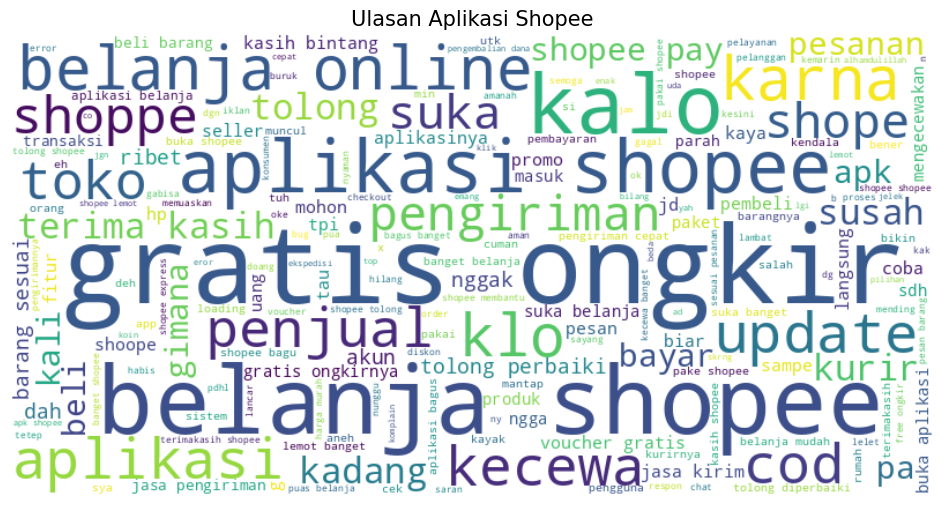

In [ ]:
from wordcloud import WordCloud

# Gabungkan semua teks ulasan ke dalam satu string
all_text = " ".join(df['text_akhir'])

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue',
    contour_width=2
).generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ulasan Aplikasi Shopee", fontsize=15)
plt.show()


Berdasarkan visualisasi WordCloud di atas, dapat dilihat bahwa kata-kata yang paling sering muncul dalam ulasan pengguna adalah:

- “belanja”, “online”, “shopee”, “aplikasi”, “pengiriman”, dan “gratis ongkir”.

- Kata lain yang juga sering muncul adalah: “update”, “penjual”, “tokonya”, “pesanan”, dan “terima kasih”.

Dari kata-kata ini, kita bisa menyimpulkan bahwa banyak pengguna menggunakan aplikasi Dana untuk bertransaksi secara online, terutama pada platform Shopee, serta memanfaatkan promo seperti gratis ongkir. Selain itu, kata-kata seperti “update”, “tolong”, dan “kecewa” mengindikasikan adanya masukan atau keluhan dari pengguna terkait performa aplikasi, seperti fitur yang kurang stabil atau adanya masalah saat melakukan transaksi.

Berdasarkan visualisasi WordCloud, terlihat bahwa kata-kata yang paling dominan dalam ulasan pengguna adalah "belanja", "online", "shopee", "aplikasi", dan "pengiriman". Hal ini menunjukkan bahwa sebagian besar pengguna menggunakan aplikasi Dana untuk keperluan transaksi belanja online, terutama di platform Shopee. Selain itu, munculnya kata-kata seperti "gratis ongkir", "penjual", dan "pesanan" mengindikasikan bahwa fitur-fitur promo dan kemudahan proses pengiriman menjadi perhatian utama bagi pengguna. Di sisi lain, kata-kata seperti "tolong", "update", dan "kecewa" juga cukup sering muncul, yang menandakan adanya keluhan atau masukan dari pengguna terkait performa aplikasi. Dengan demikian, meskipun banyak pengguna merasa terbantu dengan fitur-fitur transaksi yang disediakan, pengembang tetap perlu memperhatikan umpan balik pengguna untuk meningkatkan kualitas dan kenyamanan dalam menggunakan aplikasi Dana.

# **Pembuatan Requirements File**

In [ ]:
!pip install pipreqs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/projekdicoding/proyek_analisis_sentimen" --scan-notebooks